In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
data3 = pd.read_csv("zc.csv")

In [5]:
data3

,Unnamed: 0,logsca,logama,zdata,sur,rad,pl,med,an,em,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
0,1,2.564949,1.098612,606,1,0,0,0,0,0,...,36415,Insertion of needle into vein for collection o...,N,43.0,33,43,3.000000,13.000000,2.940000,2.940000
1,2,6.045005,4.923624,606,0,1,0,0,0,0,...,75561,MRI of heart before and after contrast,N,16.0,15,16,137.500000,422.000000,107.800000,99.890000
2,3,5.913503,4.849135,606,0,1,0,0,0,0,...,75574,CT scan of heart blood vessels and grafts with...,N,33.0,33,33,127.630000,370.000000,100.060000,92.560000
3,4,5.529429,4.429626,606,0,1,0,0,0,0,...,78452,Nuclear medicine study of vessels of heart usi...,N,21.0,21,21,83.900000,252.000000,65.780000,63.020000
4,5,7.333023,6.244147,606,0,1,0,0,0,0,...,78452,Nuclear medicine study of vessels of heart usi...,N,65.0,65,65,514.990000,1530.000000,391.925692,375.895692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77258,77282,4.569452,4.142734,606,0,0,0,1,0,0,...,92250,Photography of the retina,N,57.0,52,57,62.974737,96.491228,48.414386,47.672281
77259,77283,5.347108,5.178633,606,0,0,0,0,0,1,...,99204,"New patient office or other outpatient visit, ...",N,136.0,136,136,177.440000,210.000000,126.828750,119.419779
77260,77284,5.686975,5.410619,606,0,0,0,0,0,1,...,99205,"New patient office or other outpatient visit, ...",N,22.0,22,22,223.770000,295.000000,159.640909,148.241818
77261,77285,7.090077,6.885266,606,0,0,0,0,0,0,...,J0178,"Injection, aflibercept, 1 mg",Y,42.0,11,21,977.761905,1200.000000,766.565714,766.565714


In [87]:
data3.head()

,Unnamed: 0,logsca,logama,zdata,sur,rad,pl,med,an,em,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
0,1,2.564949,1.098612,606,1,0,0,0,0,0,...,36415,Insertion of needle into vein for collection o...,N,43.0,33,43,3.00,13.0,2.940000,2.940000
1,2,6.045005,4.923624,606,0,1,0,0,0,0,...,75561,MRI of heart before and after contrast,N,16.0,15,16,137.50,422.0,107.800000,99.890000
2,3,5.913503,4.849135,606,0,1,0,0,0,0,...,75574,CT scan of heart blood vessels and grafts with...,N,33.0,33,33,127.63,370.0,100.060000,92.560000
3,4,5.529429,4.429626,606,0,1,0,0,0,0,...,78452,Nuclear medicine study of vessels of heart usi...,N,21.0,21,21,83.90,252.0,65.780000,63.020000
4,5,7.333023,6.244147,606,0,1,0,0,0,0,...,78452,Nuclear medicine study of vessels of heart usi...,N,65.0,65,65,514.99,1530.0,391.925692,375.895692


In [7]:
clusfeat = data3[["logsca", "logama", "zdata","sur", "rad", "pl", "med", "an", "em"]]

In [8]:
clusfeat.head()

,logsca,logama,zdata,sur,rad,pl,med,an,em
0,2.564949,1.098612,606,1,0,0,0,0,0
1,6.045005,4.923624,606,0,1,0,0,0,0
2,5.913503,4.849135,606,0,1,0,0,0,0
3,5.529429,4.429626,606,0,1,0,0,0,0
4,7.333023,6.244147,606,0,1,0,0,0,0


In [9]:
pd.get_dummies(clusfeat['zdata'],prefix='zip') ## one hot for 3 digit zip

,zip_600,zip_601,zip_602,zip_603,zip_604,zip_605,zip_606,zip_607,zip_608
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
77258,0,0,0,0,0,0,1,0,0
77259,0,0,0,0,0,0,1,0,0
77260,0,0,0,0,0,0,1,0,0
77261,0,0,0,0,0,0,1,0,0


In [10]:
df = pd.concat([clusfeat,pd.get_dummies(clusfeat['zdata'],prefix='zip')],axis=1)

In [13]:
df.head(4)

,logsca,logama,zdata,sur,rad,pl,med,an,em,zip_600,zip_601,zip_602,zip_603,zip_604,zip_605,zip_606,zip_607,zip_608
0,2.564949,1.098612,606,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6.045005,4.923624,606,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,5.913503,4.849135,606,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5.529429,4.429626,606,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
df.drop(['zdata'],axis=1, inplace=True)

In [17]:
df.head()

,logsca,logama,sur,rad,pl,med,an,em,zip_600,zip_601,zip_602,zip_603,zip_604,zip_605,zip_606,zip_607,zip_608
0,2.564949,1.098612,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6.045005,4.923624,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,5.913503,4.849135,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5.529429,4.429626,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,7.333023,6.244147,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# K-means

In [18]:
scaler = preprocessing.StandardScaler().fit(df)
dfNorm = scaler.transform(df)

In [19]:
maxClusters = 20
sse = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    sse.append(kmeans.inertia_)

In [20]:
print(sse)

[1177366.7845800587, 1089458.2071670133, 965422.3615765925, 887945.1885194202, 795009.984914742, 708416.0482690104, 625299.0267511776, 546596.4550447162, 465945.9038500693, 388224.3862419265, 309193.29005840764, 231647.380947997, 154282.229740852, 117704.07507048915, 105783.08846910705, 92208.47883606619, 81782.44557038303, 72853.58910366154]


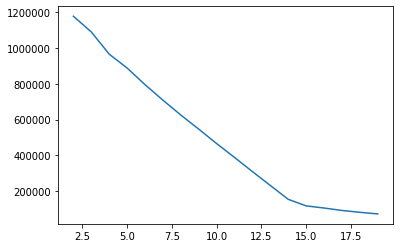

In [21]:
plt.plot(range(2,maxClusters),sse) #deciding number of clusters to use

In [22]:
maxClusters = 20
silh = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(dfNorm)
    silhouette_avg = silhouette_score(dfNorm, kmeans.labels_)
    silh.append(silhouette_avg)

In [23]:
print(silh)

[0.286186319667834, 0.29436029854682755, 0.3769242306945281, 0.4410969781552926, 0.43354311815988095, 0.48420303677287174, 0.5273639720520251, 0.5937518303970309, 0.5977094385162577, 0.6039922392751367, 0.607256165232115, 0.609064588899554, 0.6099347162718264, 0.6459255174073761, 0.6378968873051492, 0.622301981871138, 0.6135662513620896, 0.6046232123848923]


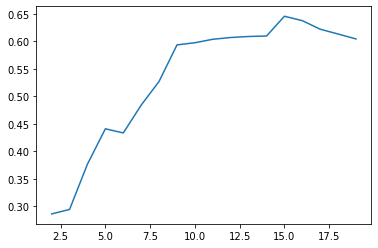

In [24]:
plt.plot(range(2,maxClusters),silh)

In [25]:
sample_silhouette_values = silhouette_samples(dfNorm, kmeans.labels_)

means_lst = []
for label in range(15):
    means_lst.append(sample_silhouette_values[kmeans.labels_ == label].mean())

In [26]:
print(means_lst) #silhouette values for each cluster in our 15 cluster solution

[0.6923585258241877, 0.6292872018658935, 0.4323954102820523, 0.5428790915238955, 0.6146773453575007, 0.6718261255864675, 0.8748649824128635, 0.8389552962720637, 0.9210153911193065, 0.8239642038443253, 0.8799661484944578, 0.9619100077315619, 0.9766123275987769, 0.4732470219867189, 0.9944976430758533]


In [27]:
kmeans = KMeans(n_clusters=15, random_state=0).fit(dfNorm) #optimal solution

In [29]:
clusdata = pd.concat([data3,pd.DataFrame(kmeans.labels_,columns=["Cluster"])],axis=1)

In [31]:
clusdata.head()

,Unnamed: 0,logsca,logama,zdata,sur,rad,pl,med,an,em,...,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,Cluster
0,1,2.564949,1.098612,606,1,0,0,0,0,0,...,Insertion of needle into vein for collection o...,N,43.0,33,43,3.00,13.0,2.940000,2.940000,14
1,2,6.045005,4.923624,606,0,1,0,0,0,0,...,MRI of heart before and after contrast,N,16.0,15,16,137.50,422.0,107.800000,99.890000,2
2,3,5.913503,4.849135,606,0,1,0,0,0,0,...,CT scan of heart blood vessels and grafts with...,N,33.0,33,33,127.63,370.0,100.060000,92.560000,2
3,4,5.529429,4.429626,606,0,1,0,0,0,0,...,Nuclear medicine study of vessels of heart usi...,N,21.0,21,21,83.90,252.0,65.780000,63.020000,2
4,5,7.333023,6.244147,606,0,1,0,0,0,0,...,Nuclear medicine study of vessels of heart usi...,N,65.0,65,65,514.99,1530.0,391.925692,375.895692,2


In [32]:
clusdata['Cluster'].value_counts()

1     31205
3     13433
2     11932
0      7016
14     5123
4      4205
9      2066
5      1559
7       337
6       207
8        94
12       37
11       37
10        9
13        3
Name: Cluster, dtype: int64

In [33]:
meanclus = clusdata.groupby('Cluster').mean()

In [34]:
meanclus

,Unnamed: 0,logsca,logama,zdata,sur,rad,pl,med,an,em,npi,nppes_provider_zip,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
Cluster,,,,,,,,,,,,,,,,,,,
0,39251.824259,6.437058,4.910394,606.0,0.999857,0.000000,0.000000,0.000000,0.000000,0.000000,1.508714e+09,5.517111e+08,72.415336,43.929447,69.716648,266.828141,1537.211110,207.716616,190.950465
1,38446.515751,5.486413,4.634340,606.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.943182,1.497875e+09,5.505455e+08,122.080759,66.285755,115.771383,119.484178,308.284646,89.676490,86.472968
2,38057.186809,5.003103,3.519689,606.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.493301e+09,5.463482e+08,75.449547,63.847972,71.942172,55.773973,269.299194,42.190720,40.149777
3,38655.452914,4.840336,3.797881,606.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.500659e+09,5.534000e+08,158.361178,68.837490,131.856175,71.485091,231.118871,55.620431,53.941466
4,37940.401902,4.200010,2.790631,606.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.491320e+09,5.539302e+08,378.143401,245.418312,349.105351,28.594104,118.299263,23.299814,23.135646
5,44830.350225,5.326656,4.047773,604.0,0.115459,0.194355,0.053881,0.173188,0.014753,0.356639,1.581486e+09,5.177264e+08,156.222130,82.317511,128.570879,107.046014,404.401387,81.556066,78.251399
6,31999.541063,5.085106,4.208259,607.0,0.202899,0.014493,0.028986,0.144928,0.024155,0.487923,1.415462e+09,5.454922e+08,121.594203,64.265700,108.864734,121.770253,313.778835,92.222771,91.562576
7,43474.724036,4.963161,3.994889,600.0,0.023739,0.186944,0.035608,0.163205,0.000000,0.528190,1.562579e+09,4.937142e+08,88.728190,55.086053,83.356083,80.369700,203.856747,59.782426,60.517740
8,37886.372340,4.690112,3.723224,601.0,0.031915,0.212766,0.117021,0.287234,0.000000,0.255319,1.491489e+09,5.186275e+08,159.914894,71.521277,126.212766,70.739464,196.206165,54.922386,52.971914


In [35]:
avg_nonMedicare_payment = (meanclus['average_submitted_chrg_amt'] - meanclus['average_Medicare_allowed_amt'])*meanclus['line_srvc_cnt']


avg_nonMedicare_payment #the difference between the average submitted charges and average allowable amount times average amount of times that service is performed in a day



Cluster
0      91995.210044
1      23048.904512
2      16110.381232
3      25279.793409
4      33921.413854
5      46453.489556
6      23347.130512
7      10956.782177
8      20063.994167
9      37962.876895
10     19849.226182
11      8067.443454
12    149931.941043
13      3095.963333
14     25963.470462
dtype: float64

In [36]:
medicare_ratio = meanclus['average_Medicare_allowed_amt'] / meanclus ['average_submitted_chrg_amt'] 
medicare_ratio #ratio of medicare allowed amount to submitted charge

Cluster
0     0.173579
1     0.387577
2     0.207108
3     0.309300
4     0.241710
5     0.264702
6     0.388077
7     0.394246
8     0.360536
9     0.135949
10    0.253854
11    0.230958
12    0.175283
13    0.395674
14    0.393919
dtype: float64

In [40]:
clusdata[(clusdata['Cluster'] == 0)].describe() #each cluster only contains data from 1 3 digit zip

,Unnamed: 0,logsca,logama,zdata,sur,rad,pl,med,an,em,npi,nppes_provider_zip,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,Cluster
count,7016.000000,7016.000000,7016.000000,7016.0,7016.000000,7016.0,7016.0,7016.0,7016.0,7016.0,7.016000e+03,7.016000e+03,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.0
mean,39251.824259,6.437058,4.910394,606.0,0.999857,0.0,0.0,0.0,0.0,0.0,1.508714e+09,5.517111e+08,72.415336,43.929447,69.716648,266.828141,1537.211110,207.716616,190.950465,0.0
std,22344.652753,1.344377,1.054648,0.0,0.011939,0.0,0.0,0.0,0.0,0.0,2.893094e+08,1.734320e+08,177.097371,75.881635,173.598086,613.475266,2928.824304,473.608963,463.304262,0.0
min,53.000000,3.491148,-0.061875,606.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.003017e+09,6.060200e+04,11.000000,11.000000,11.000000,0.940000,32.823596,0.730000,0.910000,0.0
25%,20170.750000,5.480639,4.089286,606.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.255642e+09,6.061130e+08,16.000000,14.000000,16.000000,59.697255,240.000000,45.116665,41.631024,0.0
50%,40270.500000,6.434547,4.780551,606.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.528078e+09,6.061238e+08,27.000000,21.000000,25.000000,119.170000,623.000000,90.404760,86.522341,0.0
75%,58438.250000,7.333650,5.535571,606.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.760466e+09,6.063230e+08,57.000000,41.000000,54.000000,253.552500,1530.959184,194.916125,179.617292,0.0
max,77273.000000,11.186785,10.031114,606.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.992996e+09,6.069312e+08,5203.000000,1532.000000,5203.000000,22722.570000,72170.400000,17814.500000,17413.970000,0.0


In [44]:
clusdata[(clusdata['Cluster'] == 13)].describe() #each cluster only contains data from 1 3 digit zip

,Unnamed: 0,logsca,logama,zdata,sur,rad,pl,med,an,em,npi,nppes_provider_zip,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,Cluster
count,3.0,3.000000,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.000000e+00,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,72975.0,4.850477,3.922636,603.0,0.0,0.0,0.0,0.0,0.0,1.0,1.942453e+09,60312.0,36.333333,31.666667,36.333333,55.790000,141.000000,43.218073,40.585729,13.0
std,1.0,0.561972,0.563231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,26.576932,21.548395,26.576932,28.462022,71.505245,22.354279,21.148116,0.0
min,72974.0,4.248495,3.321432,603.0,0.0,0.0,0.0,0.0,0.0,1.0,1.942453e+09,60312.0,11.000000,11.000000,11.000000,27.700000,70.000000,21.720000,20.260000,13.0
25%,72974.5,4.595069,3.664928,603.0,0.0,0.0,0.0,0.0,0.0,1.0,1.942453e+09,60312.0,22.500000,20.500000,22.500000,41.380000,105.000000,31.657109,29.643594,13.0
50%,72975.0,4.941642,4.008423,603.0,0.0,0.0,0.0,0.0,0.0,1.0,1.942453e+09,60312.0,34.000000,30.000000,34.000000,55.060000,140.000000,41.594219,39.027187,13.0
75%,72975.5,5.151467,4.223238,603.0,0.0,0.0,0.0,0.0,0.0,1.0,1.942453e+09,60312.0,49.000000,42.000000,49.000000,69.835000,176.500000,53.967109,50.748594,13.0
max,72976.0,5.361292,4.438052,603.0,0.0,0.0,0.0,0.0,0.0,1.0,1.942453e+09,60312.0,64.000000,54.000000,64.000000,84.610000,213.000000,66.340000,62.470000,13.0


In [46]:
clusdata[(clusdata['Cluster'] == 1) | (clusdata['Cluster'] == 3) | (clusdata['Cluster'] == 2)| (clusdata['Cluster'] == 0)| (clusdata['Cluster'] == 14)| (clusdata['Cluster'] == 4)| (clusdata['Cluster'] == 9)].groupby('Cluster').mean()

,Unnamed: 0,logsca,logama,zdata,sur,rad,pl,med,an,em,npi,nppes_provider_zip,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
Cluster,,,,,,,,,,,,,,,,,,,
0,39251.824259,6.437058,4.910394,606.0,0.999857,0.0,0.0,0.00000,0.0,0.000000,1.508714e+09,5.517111e+08,72.415336,43.929447,69.716648,266.828141,1537.211110,207.716616,190.950465
1,38446.515751,5.486413,4.634340,606.0,0.000000,0.0,0.0,0.00000,0.0,0.943182,1.497875e+09,5.505455e+08,122.080759,66.285755,115.771383,119.484178,308.284646,89.676490,86.472968
2,38057.186809,5.003103,3.519689,606.0,0.000000,1.0,0.0,0.00000,0.0,0.000000,1.493301e+09,5.463482e+08,75.449547,63.847972,71.942172,55.773973,269.299194,42.190720,40.149777
3,38655.452914,4.840336,3.797881,606.0,0.000000,0.0,0.0,1.00000,0.0,0.000000,1.500659e+09,5.534000e+08,158.361178,68.837490,131.856175,71.485091,231.118871,55.620431,53.941466
4,37940.401902,4.200010,2.790631,606.0,0.000000,0.0,1.0,0.00000,0.0,0.000000,1.491320e+09,5.539302e+08,378.143401,245.418312,349.105351,28.594104,118.299263,23.299814,23.135646
9,39289.931268,6.971682,5.006494,606.0,0.000000,0.0,0.0,0.00000,1.0,0.000000,1.508190e+09,5.645446e+08,33.358180,31.370765,33.354308,179.057306,1317.095318,143.964660,133.207206
14,38680.393715,3.302522,2.186732,606.0,0.184462,0.0,0.0,0.00488,0.0,0.011907,1.501134e+09,5.504038e+08,951.938259,75.397814,127.020301,17.726795,45.001117,15.850464,15.826908


In [ ]:
## 606 zip clusters only ^^^^^^

In [49]:
pd.set_option('display.max_columns', None)

In [58]:
clusdata[(clusdata['Cluster'] == 13)] ##highest ratio cluster

,Unnamed: 0,logsca,logama,zdata,sur,rad,pl,med,an,em,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,Cluster
72950,72974,4.248495,3.321432,603,0,0,0,0,0,1,1942453022,ALBRECHT,JOERG,NaN,M.D.,M,I,1900 WEST POLK STREET,"SECTION OF DERMATOLOGY, ADMIN. BUILDING, 5TH F...",CHICAGO,60312,IL,US,Dermatology,Y,O,99212,Established patient office or other outpatient...,N,34.0,30,34,27.70,70.0,21.720000,20.260000,13
72951,72975,4.941642,4.008423,603,0,0,0,0,0,1,1942453022,ALBRECHT,JOERG,NaN,M.D.,M,I,1900 WEST POLK STREET,"SECTION OF DERMATOLOGY, ADMIN. BUILDING, 5TH F...",CHICAGO,60312,IL,US,Dermatology,Y,O,99213,Established patient office or other outpatient...,N,64.0,54,64,55.06,140.0,41.594219,39.027187,13
72952,72976,5.361292,4.438052,603,0,0,0,0,0,1,1942453022,ALBRECHT,JOERG,NaN,M.D.,M,I,1900 WEST POLK STREET,"SECTION OF DERMATOLOGY, ADMIN. BUILDING, 5TH F...",CHICAGO,60312,IL,US,Dermatology,Y,O,99214,Established patient office or other outpatient...,N,11.0,11,11,84.61,213.0,66.340000,62.470000,13


In [51]:
clusdata[(clusdata['Cluster'] == 7)] ###high ratio cluster

,Unnamed: 0,logsca,logama,zdata,sur,rad,pl,med,an,em,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,Cluster
352,353,5.075482,4.303930,600,0,0,0,0,0,1,1003146267,PYSLAR,ANATOLIY,NaN,NaN,M,I,3333 GREEN BAY RD,NaN,NORTH CHICAGO,600643095,IL,US,Psychiatry,Y,O,99213,Established patient office or other outpatient...,N,81.0,20,81,73.99,160.049383,55.284444,55.235679,7
571,572,4.343805,3.841601,600,0,0,0,0,0,1,1003877762,WU,STEPHANIE,C,DPM.,F,I,3471 GREEN BAY RD,NaN,NORTH CHICAGO,600643037,IL,US,Podiatry,Y,O,99212,Established patient office or other outpatient...,N,68.0,12,68,46.60,77.000000,36.530000,34.610000,7
572,573,4.852030,4.354655,600,0,0,0,0,0,1,1003877762,WU,STEPHANIE,C,DPM.,F,I,3471 GREEN BAY RD,NaN,NORTH CHICAGO,600643037,IL,US,Podiatry,Y,O,99213,Established patient office or other outpatient...,N,108.0,20,108,77.84,128.000000,57.546389,54.599630,7
2029,2030,5.087596,4.216120,600,1,0,0,0,0,0,1023246980,ROBINSON,RICHMOND,C,DPM,M,I,3333 GREEN BAY RD,NaN,NORTH CHICAGO,600643037,IL,US,Podiatry,Y,F,11042,Removal of skin and tissue first 20 sq cm or less,N,74.0,28,74,67.77,162.000000,51.693919,48.453919,7
2030,2031,4.499810,3.201933,600,0,0,0,1,0,0,1023246980,ROBINSON,RICHMOND,C,DPM,M,I,3333 GREEN BAY RD,NaN,NORTH CHICAGO,600643037,IL,US,Podiatry,Y,F,97597,Removal of tissue from wounds per session,N,45.0,23,45,24.58,90.000000,17.128889,16.506667,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76252,76276,4.875197,3.625673,600,0,0,0,1,0,0,1982852828,RANA,KUNTAL,A,"M.D., M.S., M.P.H.",M,I,3001 GREEN BAY RD,DEPARTMENT OF RADIOLOGY / CAPT. JAMES LOVELL FHCC,NORTH CHICAGO,600643048,IL,US,Diagnostic Radiology,Y,F,93970,Ultrasound scan of veins of both arms or legs ...,N,140.0,138,140,37.55,131.000000,27.988571,25.632143,7
76253,76277,5.023881,3.166740,600,0,0,0,1,0,0,1982852828,RANA,KUNTAL,A,"M.D., M.S., M.P.H.",M,I,3001 GREEN BAY RD,DEPARTMENT OF RADIOLOGY / CAPT. JAMES LOVELL FHCC,NORTH CHICAGO,600643048,IL,US,Diagnostic Radiology,Y,F,93971,Ultrasound scan of veins of one arm or leg or ...,N,171.0,170,171,23.73,152.000000,18.023099,16.625205,7
76254,76278,5.416100,3.758406,600,0,0,0,1,0,0,1982852828,RANA,KUNTAL,A,"M.D., M.S., M.P.H.",M,I,3001 GREEN BAY RD,DEPARTMENT OF RADIOLOGY / CAPT. JAMES LOVELL FHCC,NORTH CHICAGO,600643048,IL,US,Diagnostic Radiology,Y,F,93976,"Ultrasound limited scan of abdominal, pelvic, ...",N,36.0,36,36,42.88,225.000000,33.346944,30.686667,7
76323,76347,3.912023,3.439135,600,0,0,0,1,0,0,1982945697,JOYCE,MONICA,NaN,RD CDE,F,I,9812 S DAMEN,NaN,CHICAGO,60043,IL,US,Registered Dietitian or Nutrition Professional,Y,O,97802,"Medical nutrition therapy, assessment and inte...",N,268.0,75,75,31.16,50.000000,30.227724,29.297239,7


In [55]:
clusdata[(clusdata['Cluster'] == 11)] ##radiology cluster w low costs

,Unnamed: 0,logsca,logama,zdata,sur,rad,pl,med,an,em,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,Cluster
61871,61895,5.170484,3.827227,605,0,1,0,0,0,0,1801847835,JUNDANIAN,MARK,NaN,MD,M,I,903 COMMERCE,SUITE 333,CHICAGO,605238723,IL,US,Diagnostic Radiology,Y,F,70450,CT scan head or brain,N,154.0,148,154,45.935000,176.0,33.713961,31.048571,11
61872,61896,5.468060,3.796232,605,0,1,0,0,0,0,1801847835,JUNDANIAN,MARK,NaN,MD,M,I,903 COMMERCE,SUITE 333,CHICAGO,605238723,IL,US,Diagnostic Radiology,Y,F,70486,CT scan of face,N,13.0,13,13,44.533077,237.0,34.917692,31.923077,11
61873,61897,5.866468,4.380275,605,0,1,0,0,0,0,1801847835,JUNDANIAN,MARK,NaN,MD,M,I,903 COMMERCE,SUITE 333,CHICAGO,605238723,IL,US,Diagnostic Radiology,Y,F,70551,MRI scan brain,N,26.0,26,26,79.860000,353.0,58.142692,53.133077,11
61874,61898,6.206576,4.817740,605,0,1,0,0,0,0,1801847835,JUNDANIAN,MARK,NaN,MD,M,I,903 COMMERCE,SUITE 333,CHICAGO,605238723,IL,US,Diagnostic Radiology,Y,F,70553,MRI scan of brain before and after contrast,N,21.0,21,21,123.685238,496.0,87.711905,80.221905,11
61875,61899,3.637586,2.287471,605,0,1,0,0,0,0,1801847835,JUNDANIAN,MARK,NaN,MD,M,I,903 COMMERCE,SUITE 333,CHICAGO,605238723,IL,US,Diagnostic Radiology,Y,F,71010,"X-ray of chest, 1 view, front",N,492.0,393,480,9.850000,38.0,7.280650,6.893984,11
61876,61900,3.806662,2.457021,605,0,1,0,0,0,0,1801847835,JUNDANIAN,MARK,NaN,MD,M,I,903 COMMERCE,SUITE 333,CHICAGO,605238723,IL,US,Diagnostic Radiology,Y,F,71020,"X-ray of chest, 2 views, front and side",N,210.0,205,210,11.670000,45.0,8.584571,8.186476,11
61877,61901,5.416100,4.006802,605,0,1,0,0,0,0,1801847835,JUNDANIAN,MARK,NaN,MD,M,I,903 COMMERCE,SUITE 333,CHICAGO,605238723,IL,US,Diagnostic Radiology,Y,F,71250,CT scan chest,N,37.0,37,37,54.970811,225.0,40.631081,37.979189,11
61878,61902,5.564520,4.194591,605,0,1,0,0,0,0,1801847835,JUNDANIAN,MARK,NaN,MD,M,I,903 COMMERCE,SUITE 333,CHICAGO,605238723,IL,US,Diagnostic Radiology,Y,F,71260,CT scan chest with contrast,N,56.0,56,56,66.326607,261.0,50.206250,45.933750,11
61879,61903,4.454347,2.841415,605,0,1,0,0,0,0,1801847835,JUNDANIAN,MARK,NaN,MD,M,I,903 COMMERCE,SUITE 333,CHICAGO,605238723,IL,US,Diagnostic Radiology,Y,F,72110,"X-ray of lower and sacral spine, minimum of 4 ...",N,23.0,23,23,17.140000,86.0,11.686957,10.765217,11
61880,61904,5.793014,4.057830,605,0,1,0,0,0,0,1801847835,JUNDANIAN,MARK,NaN,MD,M,I,903 COMMERCE,SUITE 333,CHICAGO,605238723,IL,US,Diagnostic Radiology,Y,F,72125,CT scan of upper spine,N,22.0,22,22,57.848636,328.0,43.281364,39.652727,11


In [56]:
clusdata[(clusdata['Cluster'] == 12)] ## high cost cluster

,Unnamed: 0,logsca,logama,zdata,sur,rad,pl,med,an,em,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,Cluster
11842,11845,4.510860,3.248117,608,0,0,0,1,0,0,1154551208,KENNEDY,CLARE,E,DPT,F,I,2500 W 94TH ST,NaN,CHICAGO,608052818,IL,US,Physical Therapist in Private Practice,Y,O,97110,"Therapeutic exercise to develop strength, endu...",N,636.0,53,456,25.741824,91.000000,19.434403,19.252594,12
11843,11846,4.488636,3.432656,608,0,0,0,1,0,0,1154551208,KENNEDY,CLARE,E,DPT,F,I,2500 W 94TH ST,NaN,CHICAGO,608052818,IL,US,Physical Therapist in Private Practice,Y,O,97112,Therapeutic procedure to re-educate brain-to-n...,N,409.0,49,396,30.958753,89.000000,23.461296,23.330416,12
11844,11847,4.317488,3.155723,608,0,0,0,1,0,0,1154551208,KENNEDY,CLARE,E,DPT,F,I,2500 W 94TH ST,NaN,CHICAGO,608052818,IL,US,Physical Therapist in Private Practice,Y,O,97140,Manual (physical) therapy techniques to 1 or m...,N,356.0,42,353,23.470000,75.000000,18.193258,17.954494,12
11845,11848,5.365976,4.454608,608,0,0,0,1,0,0,1154551208,KENNEDY,CLARE,E,DPT,F,I,2500 W 94TH ST,NaN,CHICAGO,608052818,IL,US,Physical Therapist in Private Practice,Y,O,97162,"Evaluation of physical therapy, typically 30 m...",N,25.0,24,25,86.022400,214.000000,64.808400,62.188400,12
11846,11849,4.382027,3.557141,608,0,0,0,1,0,0,1154551208,KENNEDY,CLARE,E,DPT,F,I,2500 W 94TH ST,NaN,CHICAGO,608052818,IL,US,Physical Therapist in Private Practice,Y,O,97530,"Therapeutic activities to improve function, wi...",N,236.0,38,230,35.062797,80.000000,26.738856,26.937924,12
17784,17795,2.564949,1.098612,608,1,0,0,0,0,0,1235140674,SETHI,ROMI,NaN,M.D.,F,I,9730 S WESTERN AVE,SUITE 500,CHICAGO,608052814,IL,US,Endocrinology,Y,O,36415,Insertion of needle into vein for collection o...,N,105.0,81,105,3.000000,13.000000,2.925048,2.940000,12
17785,17796,2.944439,1.166271,608,0,0,1,0,0,0,1235140674,SETHI,ROMI,NaN,M.D.,F,I,9730 S WESTERN AVE,SUITE 500,CHICAGO,608052814,IL,US,Endocrinology,Y,O,82962,Blood glucose (sugar) test performed by hand-h...,N,173.0,107,172,3.210000,19.000000,2.981561,3.132139,12
17786,17797,5.673323,5.178633,608,0,0,0,0,0,1,1235140674,SETHI,ROMI,NaN,M.D.,F,I,9730 S WESTERN AVE,SUITE 500,CHICAGO,608052814,IL,US,Endocrinology,Y,O,99204,"New patient office or other outpatient visit, ...",N,67.0,67,67,177.440000,291.000000,128.829552,122.795821,12
17787,17798,5.244923,4.742494,608,0,0,0,0,0,1,1235140674,SETHI,ROMI,NaN,M.D.,F,I,9730 S WESTERN AVE,SUITE 500,CHICAGO,608052814,IL,US,Endocrinology,Y,O,99214,Established patient office or other outpatient...,N,316.0,192,316,114.720000,189.601266,77.845823,76.368703,12
27957,27968,7.600402,5.497004,608,0,1,0,0,0,0,1366490021,"HAWTHORNE WORKS MEDICAL IMAGING, LLC",NaN,NaN,NaN,NaN,O,4701 W CERMAK RD,NaN,CHICAGO,608042508,IL,US,Independent Diagnostic Testing Facility (IDTF),Y,O,70551,MRI scan brain,N,19.0,18,19,243.960000,1999.000000,167.790000,158.014211,12


In [57]:
clusdata[(clusdata['Cluster'] == 9)].describe() #low ratio anesthesiology cluster

,Unnamed: 0,logsca,logama,zdata,sur,rad,pl,med,an,em,npi,nppes_provider_zip,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,Cluster
count,2066.000000,2066.000000,2066.000000,2066.0,2066.0,2066.0,2066.0,2066.0,2066.0,2066.0,2.066000e+03,2.066000e+03,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.000000,2066.0
mean,39289.931268,6.971682,5.006494,606.0,0.0,0.0,0.0,0.0,1.0,0.0,1.508190e+09,5.645446e+08,33.358180,31.370765,33.354308,179.057306,1317.095318,143.964660,133.207206,9.0
std,22671.132583,0.661552,0.546551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.931813e+08,1.533905e+08,76.037085,59.485420,76.037447,143.183784,953.859162,118.261081,106.013532,0.0
min,42.000000,4.357509,3.944766,606.0,0.0,0.0,0.0,0.0,1.0,0.0,1.003012e+09,6.060700e+04,11.000000,11.000000,11.000000,51.664231,78.062424,38.155921,36.812763,9.0
25%,18921.250000,6.649706,4.608425,606.0,0.0,0.0,0.0,0.0,1.0,0.0,1.245274e+09,6.061129e+08,14.000000,13.000000,14.000000,100.326033,772.556818,79.099984,74.071317,9.0
50%,41420.500000,6.959344,4.960533,606.0,0.0,0.0,0.0,0.0,1.0,0.0,1.538392e+09,6.061238e+08,19.000000,19.000000,19.000000,142.669792,1052.942308,112.281466,104.636472,9.0
75%,58110.000000,7.296536,5.228256,606.0,0.0,0.0,0.0,0.0,1.0,0.0,1.750645e+09,6.062537e+08,34.000000,33.000000,34.000000,186.467500,1475.181667,148.210524,141.406523,9.0
max,77256.000000,8.960436,7.129791,606.0,0.0,0.0,0.0,0.0,1.0,0.0,1.992969e+09,6.067400e+08,2759.000000,1998.000000,2759.000000,1248.615789,7788.749500,978.914211,910.571579,9.0
